**비지도 학습 실습**

# 실습을 위한 준비 작업.



* 파이썬 버전 체크
* 사이킷런 버전 체크
* 모듈 임포트
* 그래프 출력을 위한 약간의 코딩

In [39]:
# 파이썬 ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 공통 모듈 임포트
import numpy as np
import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "unsupervised_learning"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# 군집

## 군집을 사용한 색상 분할

K-means, imread(이미지를 읽는 함수) 임포트.

In [41]:
from sklearn.cluster import KMeans
from matplotlib.image import imread
images_path1 = os.path.join(PROJECT_ROOT_DIR, "images", "unsupervised_learning")
filename1 = "ladybug.png"
image = imread(os.path.join(images_path1, filename1))
image.shape

(533, 800, 3)

In [42]:
print (image[0,0,0])
print (image[0,0,1])
print (image[0,0,2])
print (image)

0.09803922
0.11372549
0.007843138
[[[0.09803922 0.11372549 0.00784314]
  [0.09411765 0.10980392 0.00392157]
  [0.09411765 0.11372549 0.        ]
  ...
  [0.22352941 0.4117647  0.08235294]
  [0.21960784 0.40392157 0.08627451]
  [0.20392157 0.3882353  0.07450981]]

 [[0.09411765 0.10980392 0.00392157]
  [0.09019608 0.10588235 0.        ]
  [0.09019608 0.10588235 0.        ]
  ...
  [0.23529412 0.42352942 0.08627451]
  [0.23137255 0.41568628 0.09803922]
  [0.21568628 0.4        0.08627451]]

 [[0.09019608 0.10588235 0.00784314]
  [0.08627451 0.10196079 0.00392157]
  [0.08627451 0.10196079 0.        ]
  ...
  [0.25882354 0.44705883 0.10980392]
  [0.24705882 0.43529412 0.10588235]
  [0.22745098 0.4117647  0.09411765]]

 ...

 [[0.05490196 0.07058824 0.00392157]
  [0.05490196 0.07058824 0.00392157]
  [0.05098039 0.07843138 0.00784314]
  ...
  [0.05098039 0.23921569 0.01176471]
  [0.03529412 0.21960784 0.00784314]
  [0.01960784 0.2        0.00784314]]

 [[0.05490196 0.07058824 0.00392157]
  [

533, 800, 3 배열(image)을 425400, 3 배열(X)로 변환하여 KMeans 알고리즘 적용.

In [45]:
X = image.reshape(-1, 3)
kmeans = KMeans(n_clusters=8, random_state=42, n_init=10).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_] #kmeans.labels(0~7)에 따라서, 동일한 클러스터에 속한 픽셀들에는 동일한 색상(클러스터 평균 컬러)을 할당.
print (kmeans.labels_)
print (segmented_img.shape)
#print (segmented_img)
segmented_img = segmented_img.reshape(image.shape)
print (segmented_img.shape)

[0 0 0 ... 5 5 0]
(426400, 3)
(533, 800, 3)


In [46]:
print (X.shape)
print (X)

(426400, 3)
[[0.09803922 0.11372549 0.00784314]
 [0.09411765 0.10980392 0.00392157]
 [0.09411765 0.11372549 0.        ]
 ...
 [0.03921569 0.22745098 0.        ]
 [0.01960784 0.20392157 0.        ]
 [0.00784314 0.1882353  0.        ]]


In [47]:
print (segmented_img[0,0,0])
print (segmented_img[0,0,1])
print (segmented_img[0,0,2])
print (segmented_img)

0.021990687
0.10830453
0.005679738
[[[0.02199069 0.10830453 0.00567974]
  [0.02199069 0.10830453 0.00567974]
  [0.02199069 0.10830453 0.00567974]
  ...
  [0.2132627  0.38076016 0.05517572]
  [0.2132627  0.38076016 0.05517572]
  [0.2132627  0.38076016 0.05517572]]

 [[0.02199069 0.10830453 0.00567974]
  [0.02199069 0.10830453 0.00567974]
  [0.02199069 0.10830453 0.00567974]
  ...
  [0.2132627  0.38076016 0.05517572]
  [0.2132627  0.38076016 0.05517572]
  [0.2132627  0.38076016 0.05517572]]

 [[0.02199069 0.10830453 0.00567974]
  [0.02199069 0.10830453 0.00567974]
  [0.02199069 0.10830453 0.00567974]
  ...
  [0.2132627  0.38076016 0.05517572]
  [0.2132627  0.38076016 0.05517572]
  [0.2132627  0.38076016 0.05517572]]

 ...

 [[0.02199069 0.10830453 0.00567974]
  [0.02199069 0.10830453 0.00567974]
  [0.02199069 0.10830453 0.00567974]
  ...
  [0.09567662 0.24869078 0.01605229]
  [0.09567662 0.24869078 0.01605229]
  [0.09567662 0.24869078 0.01605229]]

 [[0.02199069 0.10830453 0.00567974]
  

클러스터 개수(K값)를 바꿔가며  색상분할 수행.

In [48]:
segmented_imgs = []
n_colors = (10, 8, 6, 4, 2)
for n_clusters in n_colors:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init = 10).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]  #kmeans.labels(0~7)에 따라서, 동일한 클러스터에 속한 픽셀들에는 동일한 색상(클러스터 평균 컬러)을 할당.
    segmented_imgs.append(segmented_img.reshape(image.shape))

In [49]:
print (segmented_imgs[0].shape)
print (segmented_imgs[1].shape)
print (segmented_imgs[2].shape)
print (segmented_imgs[3].shape)
print (segmented_imgs[4].shape)
#print (segmented_imgs[5].shape)

(533, 800, 3)
(533, 800, 3)
(533, 800, 3)
(533, 800, 3)
(533, 800, 3)


그림 저장: image_segmentation_diagram1


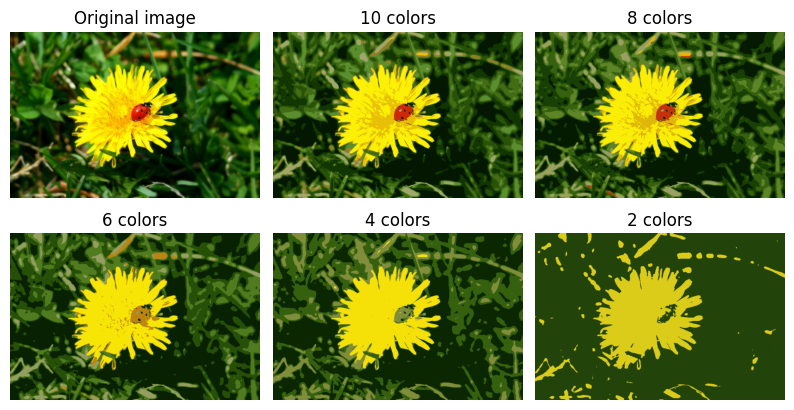

In [50]:
plt.figure(figsize=(10,5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(231)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(232 + idx)
    plt.imshow(segmented_imgs[idx])
    plt.title("{} colors".format(n_clusters))
    plt.axis('off')

save_fig('image_segmentation_diagram1', tight_layout=False)
plt.show()

## 군집을 이용한 전처리

MNIST와 유사하게 숫자 0에서 9까지 8x8 흑백 이미지 1,797개로 이루어진 _숫자 데이터셋_ 을 가지고 실습 진행.

In [51]:
from sklearn.datasets import load_digits

특성과 레이블을 각각 X_dig, y_dig에 담기

In [52]:
X_digits, y_digits = load_digits(return_X_y=True)

훈련 세트와 테스트 세트로 나누기

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, random_state=42) # 75%는 training set, 25%는 test set

In [55]:
print (X_digits.shape)  # 8x8 (64) 흑백 이미지
print (X_train.shape)
print (X_test.shape)

(1797, 64)
(1347, 64)
(450, 64)


로지스틱 회귀 모델을 훈련. test set으로 성능 평가.
로지스틱 회귀에 대한 설명은 이론 강의 자료 참고.

In [56]:
from sklearn.linear_model import LogisticRegression

In [57]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=5000, multi_class='ovr', random_state=42)

In [58]:
log_reg_score = log_reg.score(X_test, y_test)
log_reg_score

0.9688888888888889

기본 모델의 정확도는 96.89% 

훈련 세트를 50개의 클러스터로 만들고 이미지를 이 클러스터까지 거리로 바꾼 다음 로지스틱 회귀 모델을 적용하는 파이프라인을 만듦.

In [59]:
from sklearn.pipeline import Pipeline

In [60]:
print (y_train.shape)
print (y_train)

(1347,)
[5 2 0 ... 2 7 1]


In [67]:
pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=50, random_state=42, n_init = 10)),
    ("log_reg", LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)),
])
pipeline.fit(X_train, y_train)

print (y_train.shape)
print (y_train)

(1347,)
[5 2 0 ... 2 7 1]


In [63]:
print (pipeline)

Pipeline(steps=[('kmeans', KMeans(n_clusters=50, n_init=10, random_state=42)),
                ('log_reg',
                 LogisticRegression(max_iter=5000, multi_class='ovr',
                                    random_state=42))])


In [68]:
pipeline_score = pipeline.score(X_test, y_test)
pipeline_score

0.9733333333333334

얼마나 오차가 감소했나요?

In [69]:
1 - (1 - pipeline_score) / (1 - log_reg_score)

0.1428571428571439

오차율이 28.5%나 줄었음.
K는 임의로 결정한 값임.
가장 큰 오차 감소율을 나타내는 K값을 grid search를 통해 찾아보자.

In [70]:
from sklearn.model_selection import GridSearchCV

파이프 라인(k-means 이용하여 이미지를 k개의 클러스터까지의 거리로 바꾸고 로지스턱 회귀 적용)

**경고**: 사용하는 하드웨어에 따라 다음 셀을 실행하는데 20분 또는 그 이상 시간이 소요될 수 있음.

In [71]:
param_grid = dict(kmeans__n_clusters=range(90, 101))
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=2)
grid_clf.fit(X_train, y_train)

Fitting 3 folds for each of 11 candidates, totalling 33 fits
[CV] END ..............................kmeans__n_clusters=90; total time=  34.1s
[CV] END ..............................kmeans__n_clusters=90; total time=  37.3s
[CV] END ..............................kmeans__n_clusters=90; total time=  33.8s
[CV] END ..............................kmeans__n_clusters=91; total time=  41.9s
[CV] END ..............................kmeans__n_clusters=91; total time=  37.9s
[CV] END ..............................kmeans__n_clusters=91; total time=  38.5s
[CV] END ..............................kmeans__n_clusters=92; total time=  33.1s
[CV] END ..............................kmeans__n_clusters=92; total time=  37.8s
[CV] END ..............................kmeans__n_clusters=92; total time=  33.4s
[CV] END ..............................kmeans__n_clusters=93; total time=  35.0s
[CV] END ..............................kmeans__n_clusters=93; total time=  39.2s
[CV] END ..............................kmeans__n

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kmeans',
                                        KMeans(n_clusters=50, n_init=10,
                                               random_state=42)),
                                       ('log_reg',
                                        LogisticRegression(max_iter=5000,
                                                           multi_class='ovr',
                                                           random_state=42))]),
             param_grid={'kmeans__n_clusters': range(90, 101)}, verbose=2)

최적의 클러스터 개수 확인!

In [74]:
print (grid_clf)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kmeans',
                                        KMeans(n_clusters=50, n_init=10,
                                               random_state=42)),
                                       ('log_reg',
                                        LogisticRegression(max_iter=5000,
                                                           multi_class='ovr',
                                                           random_state=42))]),
             param_grid={'kmeans__n_clusters': range(90, 101)}, verbose=2)


In [75]:
grid_clf.best_params_

{'kmeans__n_clusters': 98}

In [76]:
grid_clf.score(X_test, y_test)

0.9777777777777777

최적의 k를 찾아서 clustering을 통한 전처리를 수행하면 더 나은 모델 성능을 기대할 수 있음. 물론 더욱 많은 시간이 필요함.

## 군집을 사용한 준지도 학습

레이블이 없는 샘플이 많고 레이블이 있는 샘플이 적을 때 군집을 사용하여 준지도 학습을 수행할 수 있음.

레이블을 가진 샘플이 50개만 있을 때 로지스틱 회귀 모델의 성능을 확인해보자.
50 개의 훈련 샘플만을 가지고 예측모델을 만들고 test set에 적용.

In [77]:
n_labeled = 50

In [78]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", random_state=42)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])
log_reg.score(X_test, y_test)

0.8333333333333334

In [79]:
print (X_train[:50].shape)

(50, 64)


훨씬 낮은 예측성능. 당연한 결과.

1. 전체 훈련 세트를 클러스터 50개로 군집
2. 각 클러스터에서 센트로이드에 가장 가까운 이미지를 찾음. (대표 이미지)

In [80]:
k = 50

In [82]:
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
X_digits_dist = kmeans.fit_transform(X_train)
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train[representative_digit_idx]

In [85]:
print (X_digits_dist.shape) # 훈련 샘플들의 각 클러스터 센트로이드까지의 거리 정보.

(1347, 50)


In [86]:
print (representative_digit_idx) #각 센트로이드(50개)로부터 가장 가까운 샘플들의 ID정보.

[ 986  114  828   26  588  855  460  325  783  850  843  683  919  753
  159  817  348  481  791  861  509  704  780  689 1022  702  749  411
 1057  731   23 1196  841  648  976 1138  987   50  256  494  795 1005
  602  369 1056  357  176  647 1071  258]


대표 이미지를 출력해보고
수동으로 레이블을 매겨 보자.

그림 저장: representative_images_diagram


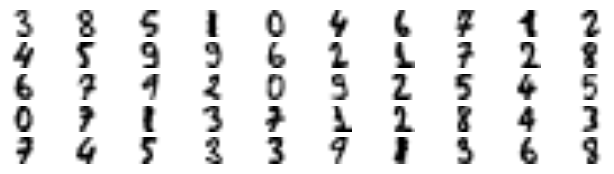

In [87]:
plt.figure(figsize=(8, 2))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8), cmap="binary", interpolation="bilinear")
    plt.axis('off')

save_fig("representative_images_diagram", tight_layout=False)
plt.show()

In [88]:
y_train[representative_digit_idx]  # 각 센트로이드로부터 가장 가까운 샘플들의 실제 레이블 정보.

array([3, 8, 5, 1, 0, 4, 6, 7, 1, 2, 4, 5, 9, 9, 6, 2, 1, 7, 2, 8, 6, 7,
       9, 2, 0, 9, 2, 5, 4, 5, 0, 7, 1, 3, 7, 1, 2, 8, 4, 3, 7, 4, 5, 3,
       3, 9, 1, 3, 6, 8])

In [91]:
y_representative_digits = np.array([3, 8, 5, 1, 0, 4, 6, 7, 1, 2, 4, 5, 9, 9, 6, 2, 1, 7, 2, 8, 6, 7, 9, 2, 0, 9, 2, 5, 4, 5, 0, 7, 1, 3, 7, 1, 2, 8, 4, 3, 7, 4, 5, 3, 3, 9, 1, 3, 6, 8])

이 데이터셋은 레이블이 있는 샘플이 50개뿐이지만
각 샘플은 클러스터의 대표 이미지임.
과연 성능이 향상되었을까?

In [93]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

0.8955555555555555

83.3%에서 89.5%로 예측 성능 향상! 

여전히 50개의 샘플로만 모델을 훈련했음. 
샘플에 레이블을 다는 것은 비용이 많이 들고 어려운 작업임.
특히 전문가가 수동으로 작업할 때 그러함.

이 때 **랜덤한 샘플보다는 대표 샘플에 레이블을 다는 것이 더 좋은 선택이 될 수 있음!!!**

더 향상 시킬 수 있을가? 
이 레이블을 같은 클러스터에 있는 다른 모든 샘플에 전파하면 어떨까?

In [94]:
y_train_propagated = np.empty(len(X_train), dtype=np.int32)
for i in range(k):
    y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]  #같은 클러스터에 있는 모든 샘플들에 레이블을 전파

In [95]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train_propagated)

LogisticRegression(max_iter=5000, multi_class='ovr', random_state=42)

In [97]:
log_reg.score(X_test, y_test)

0.9288888888888889

정확도가 더욱 향상되었음. 

모든샘플에 전파하지 말고
센트로이드에 가까운 샘플에만 레이블을 전파하는 것은 어떨까?

왜냐하면 전체 클러스터에 전파하면 
일부 이상치에 잘못된 레이블을 할당할 수 있기 때문.

레이블을 센트로이드에 가까운 샘플의 25%에만 전파해보면 어떨까?

In [98]:
percentile_closest = 25

X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1

In [99]:
partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

In [100]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)

LogisticRegression(max_iter=5000, multi_class='ovr', random_state=42)

In [101]:
log_reg.score(X_test, y_test)

0.92

정확도 약간 감소

레이블된 샘플 50개(클래스당 평균 5개 샘플!)만 가지고 92.8% 성능을 달성했음.

레이블된 전체 숫자 데이터셋에서 훈련한 로지스틱 회귀의 성능(96.9%)과 견줄만한 성능!!

이러한 이유는
전파된 레이블이 실제로 매우 좋기 때문입니다. 이 정확도는 99%에 가깝움!!!

In [102]:
np.mean(y_train_partially_propagated == y_train[partially_propagated])

0.9776536312849162

*이런식으로 비지도 학습법을 이용하여 레이블이 부족한 데이터셋에 대한 한계를 !!어느 정도는!! 극복할 수 있음*

## DBSCAN 실습

In [103]:
from sklearn.datasets import make_moons

In [104]:
X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)

In [105]:
from sklearn.cluster import DBSCAN

In [113]:
print(X, y)

[[-0.02137124  0.40618608]
 [ 0.97670045 -0.45832306]
 [ 0.90405882 -0.37651952]
 ...
 [ 1.66258462 -0.3079193 ]
 [-0.94355873  0.3278936 ]
 [ 0.79419406  0.60777171]] [1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 0 0 1 0 0 0 1
 1 1 0 0 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 1 0 0 1 0 0 1 0 1 1 1 1 0 1 0 0 1 1
 0 0 1 0 1 0 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 0 1 1 0 1 0 1 1 1 1 0 1 1
 1 1 1 0 0 0 1 1 0 1 0 1 0 0 1 1 0 1 1 1 1 0 1 1 0 0 0 0 0 0 0 1 0 1 1 1 0
 1 0 1 0 1 0 1 0 0 1 0 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 1
 0 0 0 1 1 1 1 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 0 1 0 0 1 1 1 0 1 0 1 1 0 1
 1 0 1 0 1 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1
 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 1 0 0 1 0 1 1 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0
 1 0 0 0 1 0 0 0 1 1 0 1 1 1 1 1 1 1 0 0 0 0 1 0 0 0 0 1 1 1 0 0 1 0 1 0 1
 1 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1
 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 1 1 0 1 1 0 0 1 0 1 0 0 0 1 1 0 0 1 1 1 1 1
 0 0 1 

In [127]:
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

In [129]:
dbscan.labels_[:100]  #모든 샘플의 레이블은 인스턴스 변수 labels_에 저장되어 있음. (-1은 이상치)

array([ 0,  2, -1, -1,  1,  0,  0,  0,  2,  5,  2,  3,  0,  2,  2,  2,  4,
        2,  2,  4,  0,  5,  1,  0,  5,  5,  3,  2,  2,  2,  4,  5,  0,  6,
        1, -1,  0,  0,  2,  3, -1,  3,  4, -1,  4,  4,  2,  0,  6,  2,  0,
        2,  4,  0,  3,  3,  0,  3,  5,  2, -1,  3,  0,  5,  0,  0,  0,  2,
        3,  0,  3,  6,  0,  2,  4,  4,  0,  3,  0,  4,  0,  3, -1,  3,  4,
        0, -1,  2,  2,  4,  1,  6,  0,  5,  2,  6,  2,  3,  3, -1])

In [130]:
len(dbscan.core_sample_indices_) #핵심샘플의 인덱스는 core_sample_indices에 저장

808

In [131]:
dbscan.core_sample_indices_[:100] #핵심샘플의 인덱스

array([  0,   4,   5,   6,   7,   8,  10,  11,  12,  13,  14,  16,  17,
        18,  19,  20,  21,  22,  23,  24,  25,  26,  28,  29,  30,  31,
        32,  33,  34,  36,  38,  39,  41,  42,  44,  45,  47,  49,  50,
        51,  52,  53,  54,  55,  56,  58,  59,  61,  63,  64,  65,  66,
        67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,
        80,  81,  83,  84,  85,  87,  88,  89,  90,  91,  93,  94,  96,
        97,  98, 102, 103, 104, 105, 106, 107, 108, 109, 110, 113, 114,
       115, 116, 117, 119, 120, 122, 123, 124, 125])

In [132]:
dbscan.components_[:10] #핵심샘플 자체는 components_에 저장되어 있음.

array([[-0.02137124,  0.40618608],
       [-0.84192557,  0.53058695],
       [ 0.58930337, -0.32137599],
       [ 0.29248724, -0.20696309],
       [-0.02637836,  0.44766267],
       [ 1.6201408 , -0.28758856],
       [ 1.26718285, -0.40793471],
       [ 0.87418608,  0.50781041],
       [ 0.3322007 , -0.19032202],
       [ 1.952812  ,  0.22552333]])

In [133]:
np.unique(dbscan.labels_) #unique한 레이블은 총 7개, -1은 이상치

array([-1,  0,  1,  2,  3,  4,  5,  6])

In [134]:
dbscan2 = DBSCAN(eps=0.2)
dbscan2.fit(X)

DBSCAN(eps=0.2)

In [135]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

그림 저장: dbscan_plot


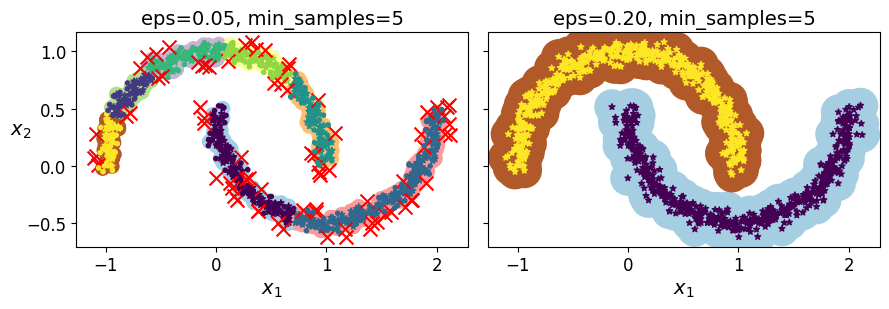

In [136]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan, X, size=100)

plt.subplot(122)
plot_dbscan(dbscan2, X, size=600, show_ylabels=False)

save_fig("dbscan_plot")
plt.show()
